In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 27

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(72, activation='relu'),  # increased from 20 to 64 neurons
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(36, activation='relu'),  # increased from 10 to 32 neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 72)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             999 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,723 (26.26 KB)

 Trainable params: 6,723 (26.26 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0273 - loss: 3.4009
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0409 - loss: 3.3545 - val_accuracy: 0.1191 - val_loss: 3.1271
Epoch 2/1000
19/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0912 - loss: 3.1570 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0963 - loss: 3.1388 - val_accuracy: 0.1307 - val_loss: 2.9572
Epoch 3/1000
20/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1436 - loss: 2.9819 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1440 - loss: 2.9659 - val_accuracy: 0.2142 - val_loss: 2.7120
Epoch 4/1000
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1860 - loss: 2.7920 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8190 - loss: 0.6012 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[1.3658644e-07 1.3573584e-03 8.0639975e-06 1.7622126e-03 4.2090807e-05
 1.8194495e-04 8.3579244e-10 2.8917125e-06 5.5883856e-07 8.4579383e-08
 1.1344005e-02 1.4349098e-05 1.1494417e-05 2.6617548e-05 9.1580205e-07
 1.9044080e-06 1.3932573e-08 2.1756718e-01 8.3231826e-06 3.9693594e-05
 7.3527980e-01 1.2676719e-02 1.9591982e-02 6.6620807e-05 7.6190908e-08
 1.2555565e-05 2.3566763e-06]
20


# 混同行列

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


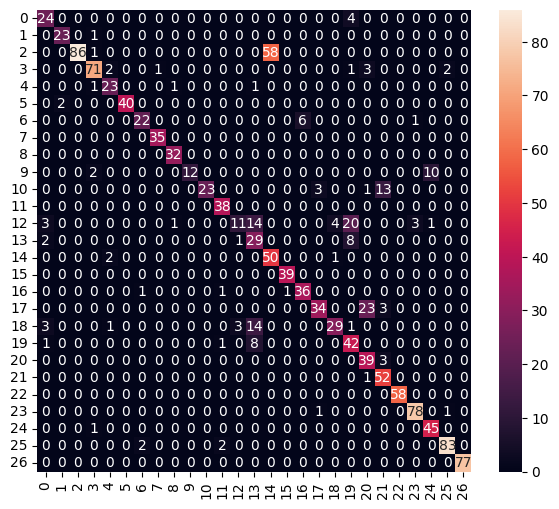

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        28
           1       0.92      0.96      0.94        24
           2       1.00      0.59      0.74       145
           3       0.92      0.89      0.90        80
           4       0.82      0.88      0.85        26
           5       1.00      0.95      0.98        42
           6       0.88      0.76      0.81        29
           7       0.97      1.00      0.99        35
           8       0.94      1.00      0.97        32
           9       1.00      0.50      0.67        24
          10       1.00      0.57      0.73        40
          11       0.90      1.00      0.95        38
          12       0.73      0.19      0.31        57
          13       0.44      0.72      0.55        40
          14       0.46      0.94      0.62        53
          15       0.97      1.00      0.99        39
          16       0.86      0.92      0.89        39
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp_hpk3698\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp_hpk3698\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmp_hpk3698'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2114531776400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2114531780624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2114531782160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2114531777360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2113144552912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2113144548304: TensorSpec(shape=(), dtype=tf.resource, name=None)


13488

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.01 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3603066e-07 1.3766829e-03 7.9134761e-06 1.6854052e-03 4.3216482e-05
 1.7983014e-04 7.8724366e-10 2.8218685e-06 5.5523509e-07 8.9603390e-08
 1.1225861e-02 1.3282642e-05 1.1567651e-05 2.6648628e-05 9.2468304e-07
 1.8459416e-06 1.2887692e-08 2.1595368e-01 8.4982330e-06 3.9575269e-05
 7.3675710e-01 1.3021200e-02 1.9560544e-02 6.8076464e-05 7.7634724e-08
 1.1961820e-05 2.4397257e-06]
20
